<a href="https://colab.research.google.com/github/sami3102/Ybi-Foundation/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#IMPORT LIBRARY
import numpy as np
import pandas as pd
#import quandl
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)
# Set start and end date for stock prices
start_date = datetime.date(2009, 3,8)
end_date = datetime.date.today()
# Load data from Quandl

In [9]:
data = pd.read_csv("/content/sap_stock.csv", low_memory = False, skiprows = 1, encoding = "ISO8859-1")
#data.to_csv('data/sap_stock.csv')
print("The GTD dataset has {} samples with {} features.".format(*data.shape))

The GTD dataset has 2550 samples with 11 features.


# New Section

In [10]:
data.head()

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,NaN,NaN,NaN
1,2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,NaN,NaN,NaN
2,2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,NaN,NaN,NaN
3,2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,NaN,NaN,NaN
4,2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,NaN,NaN,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2550 non-null   object 
 1   Open                   2242 non-null   float64
 2   High                   2543 non-null   float64
 3   Low                    2543 non-null   float64
 4   Close                  2550 non-null   float64
 5   Change                 11 non-null     float64
 6   Traded Volume          2504 non-null   float64
 7   Turnover               2497 non-null   float64
 8   Last Price of the Day  0 non-null      float64
 9   Daily Traded Units     0 non-null      float64
 10  Daily Turnover         7 non-null      float64
dtypes: float64(10), object(1)
memory usage: 219.3+ KB


In [12]:
data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
count,2242.000000,2543.000000,2543.000000,2550.000000,11.000000,2.504000e+03,2.497000e+03,0.0,0.0,7.0
mean,56.686896,61.563225,60.535073,60.995955,-0.070000,3.296818e+06,1.828440e+08,NaN,NaN,0.0
std,18.320821,21.184135,20.934460,21.097480,0.709761,2.004323e+06,9.350710e+07,NaN,NaN,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,1.767350e+05,NaN,NaN,0.0
25%,41.500000,43.430000,42.590000,42.950000,-0.500000,2.131686e+06,1.300462e+08,NaN,NaN,0.0
50%,56.560000,58.480000,57.580000,58.015000,-0.290000,2.852772e+06,1.626544e+08,NaN,NaN,0.0
75%,67.732500,78.365000,77.085000,77.762500,0.085000,3.878528e+06,2.104511e+08,NaN,NaN,0.0
max,100.100000,108.520000,107.020000,107.800000,1.250000,3.645671e+07,1.369431e+09,NaN,NaN,0.0


In [13]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume',
       'Turnover', 'Last Price of the Day', 'Daily Traded Units',
       'Daily Turnover'],
      dtype='object')

In [14]:
df = pd.DataFrame(data, columns=['Date','Close'])

In [15]:
df = df.reset_index()

In [16]:
df.head()

,index,Date,Close
0,0,2009-03-09,25.59
1,1,2009-03-10,26.87
2,2,2009-03-11,26.64
3,3,2009-03-12,26.18
4,4,2009-03-13,25.73


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   2550 non-null   int64  
 1   Date    2550 non-null   object 
 2   Close   2550 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.9+ KB


In [18]:
df.isna().values.any()

False

In [19]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates
years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

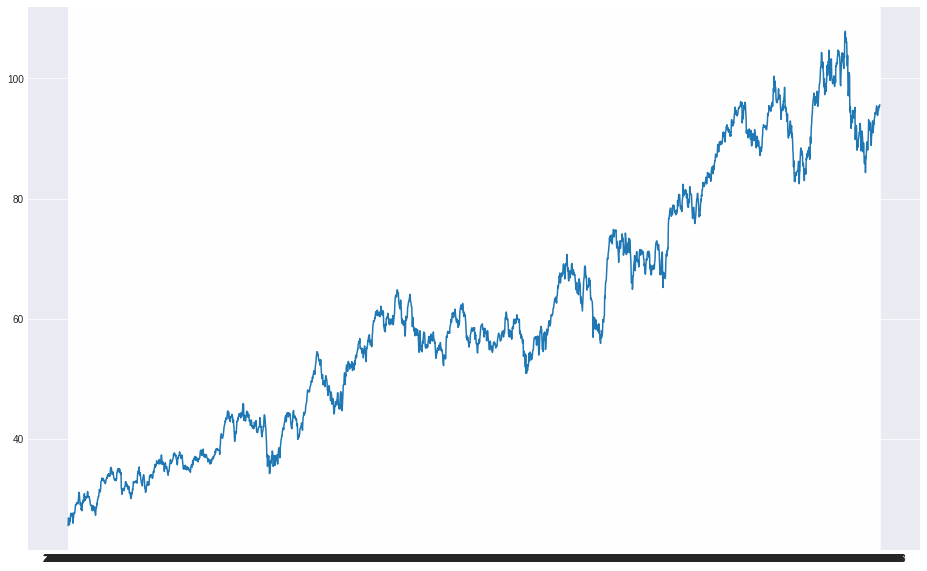

In [20]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

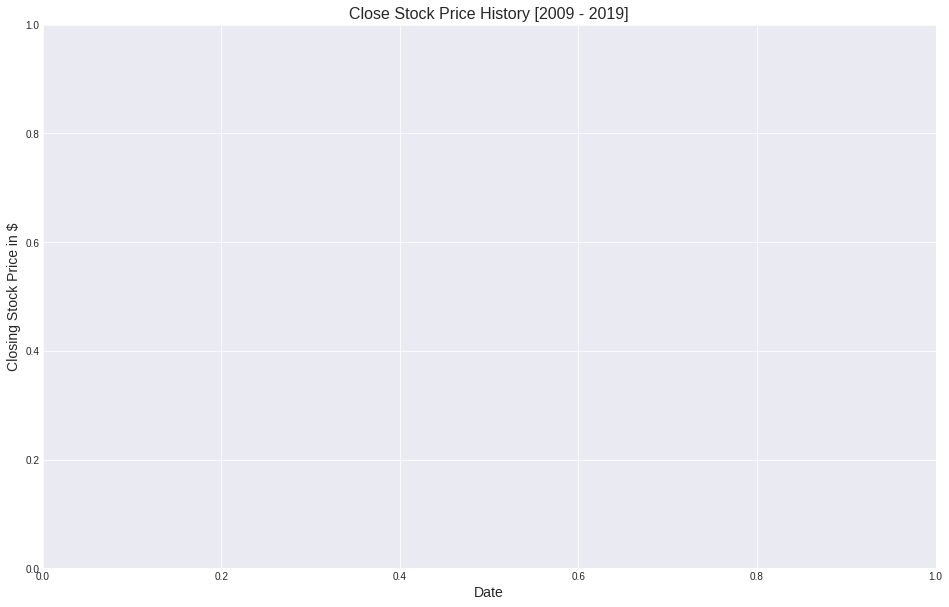

In [21]:
# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
# Set figure title
17
plt.title('Close Stock Price History [2009 - 2019]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)
# Rotate and align the x labels
fig.autofmt_xdate()

In [22]:
# Show plot
plt.show()

In [23]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)
# Import package for linear model
from sklearn.linear_model import LinearRegression
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']


In [24]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)


LinearRegression()

<ipython-input-25-c40fd3f6d32a>:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('Slope: ', np.asscalar(np.squeeze(model.coef_)))


Slope:  0.027538157830699336
Intercept:  25.875920011745414


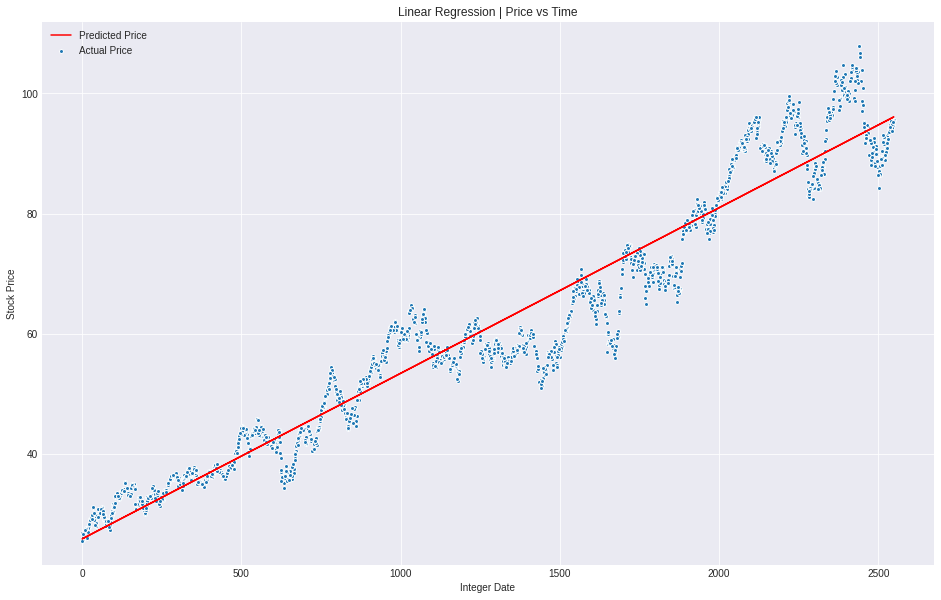

In [25]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [26]:
# Create test arrays

X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [27]:
# Generate array with predicted values
y_pred = model.predict(X_test)
print(y_pred[0:25])
#df['Prediction'] = y_pred[:24]
print(type(y_pred))


[86.37725277 46.17154233 69.33113307 36.47811078 82.6320633  75.38952779
 53.93730284 45.12509234 74.205387   42.59158181 75.11414621 76.05044358
 38.4883963  50.08196074 84.86265409 40.36099103 60.2986173  85.08295935
 71.97479622 74.61845937 37.38686998 84.11912382 46.83245812 33.25614631
 81.72330409]
<class 'numpy.ndarray'>


In [28]:
# Generate 25 random numbers
randints = np.random.randint(2550, size=25)


In [29]:
# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]
df_sample['Prediction']=y_pred[0:25]

<ipython-input-29-b605cb37a969>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['Prediction']=y_pred[0:25]


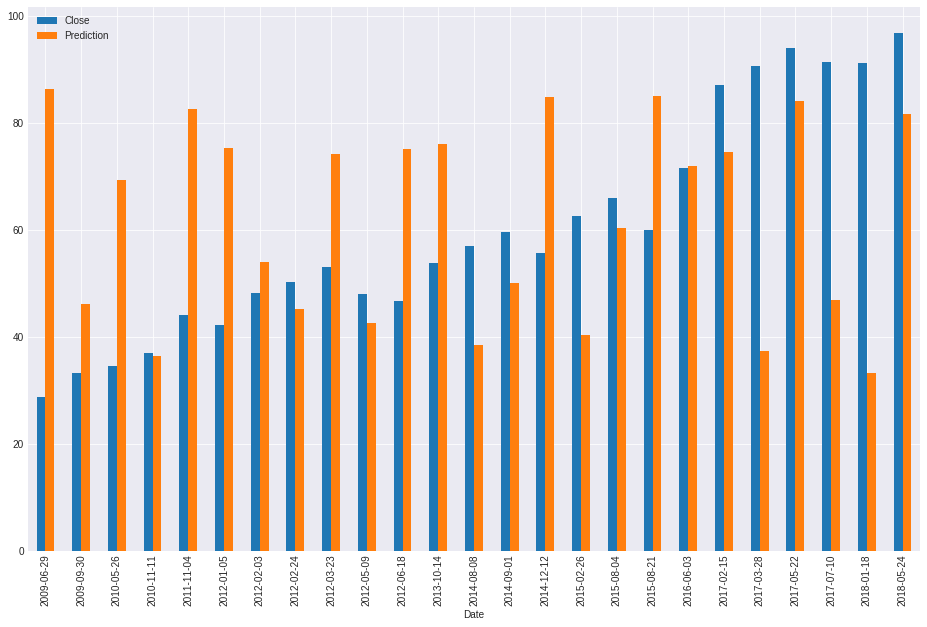

In [30]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Close', 'Prediction'], kind='bar', ax=ax)


Text(0, 0.5, 'Stock Price in $')

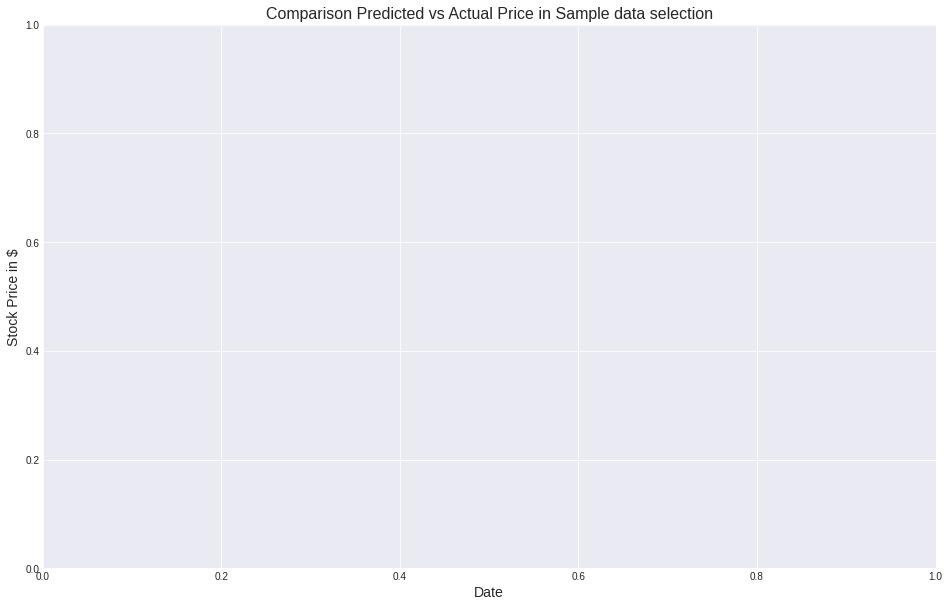

In [31]:
# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)


# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

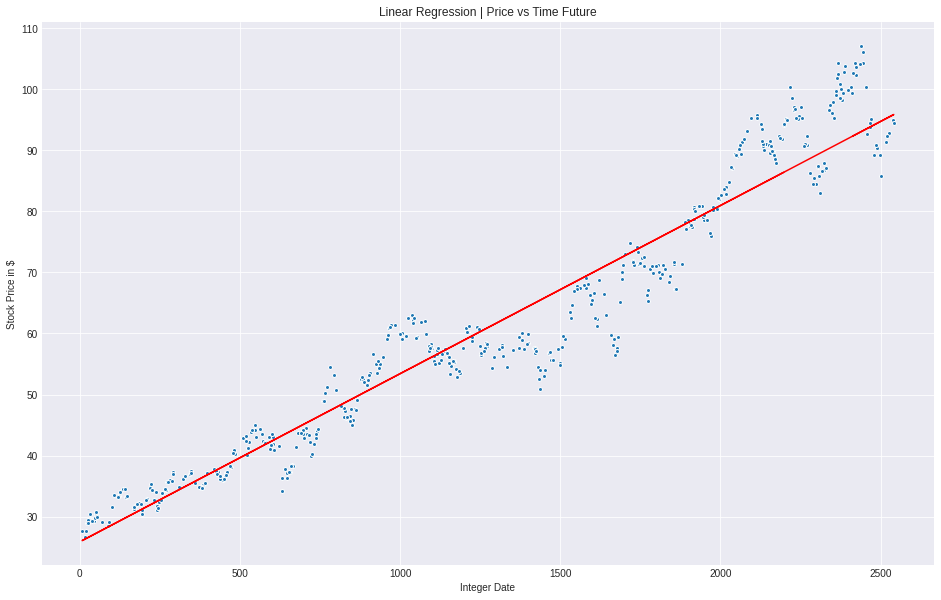

In [32]:
# Show plot

plt.show()
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time Future')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')
plt.show()

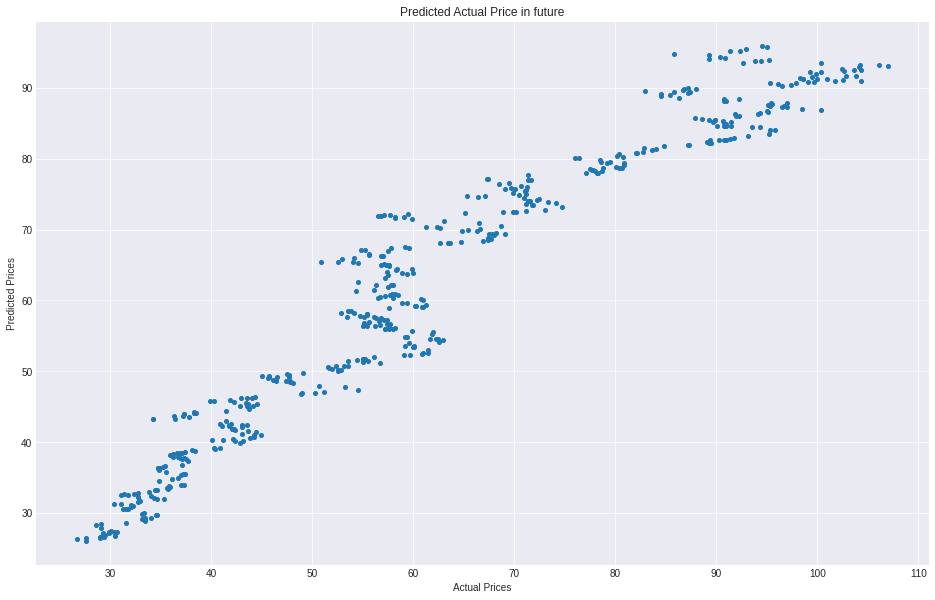

In [33]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)
21
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted Actual Price in future')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


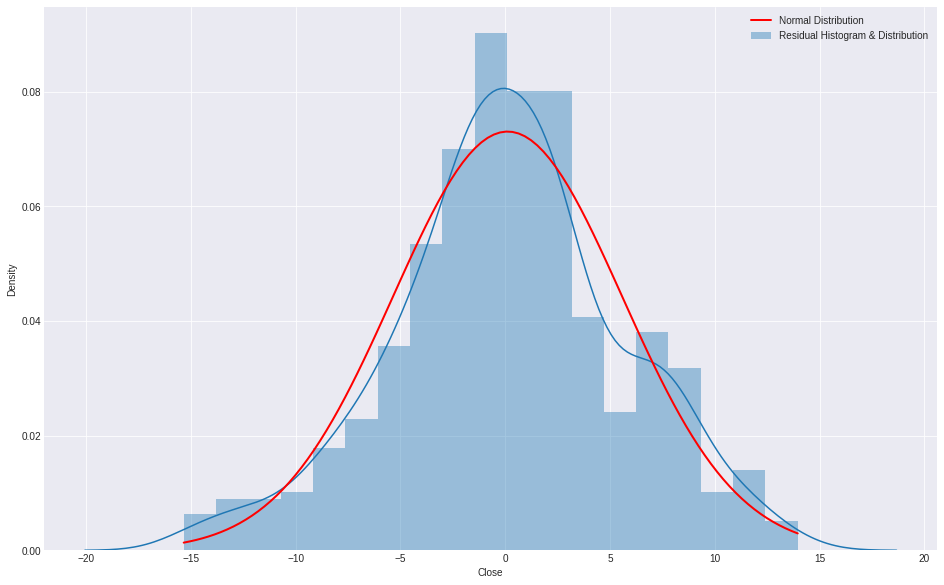

In [34]:
# Import norm package to plot normal distribution
from scipy.stats import norm
# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)
ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')
# Calculate the pdf over a range of values 
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)
# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()

In [35]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))


In [36]:
# Statistical summary of test data
df['Close'].describe()


count    2550.000000
mean       60.995955
std        21.097480
min        25.590000
25%        42.950000
50%        58.015000
75%        77.762500
max       107.800000
Name: Close, dtype: float64

In [38]:
import sklearn.metrics as metrics

In [39]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', metrics.r2_score(y_test, y_pred))
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)


Mean Absolute Error: 4.2403094945171835
Mean Squared Error: 29.86288242529205
Root Mean Squared Error: 5.464694174909704
R2:  0.9354120218496718


0.9354397679059294